# Sales Analysis - AAL 


## 1. Data wrangling

In [4]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
import os 
os.getcwd() 

'C:\\Users\\mmrto'

In [6]:
# importing dataset 
df = pd.read_csv('AALsales.csv')
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [7]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [8]:
#identifying data types 
df.dtypes

#converting the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
#removes leading and trailing whitespace from all string-type elements 

df = df.applymap(lambda x : x.strip() if isinstance(x,str) else x )

## Checking missing values in each rows¶


In [10]:
# checking missing data
missing_data = df.isnull().sum()

# counting number of rows
row_number = len(df)

# non_missing_data
non_missing_data =df.notna().sum()
print(f'Total no. of rows:{row_number}\n\nMissing Data:\n{missing_data}\n\nNon-missing Data:\n{non_missing_data}')

Total no. of rows:7560

Missing Data:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Non-missing Data:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


#### The above indicates that there is no missing data in the dataset

### Dropping Missing Values(Nullvalues)

If the missing values are small in number and occur randomly, dropping them might be a reasonable approach using df.dropna()

### Filling Null Values

 Replace missing values with a reasonable estimate. This could involve using statistical measures such as mean, median, or mode for numerical data using df.fillna()

## Normalisation

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numerical columns for normalization
numerical_cols = df[['Unit','Sales']]

# Fitting and transforming the data 
normalised_cols =MinMaxScaler().fit_transform(numerical_cols)

# Converting normalized data back to a DataFrame
normalised_df =pd.DataFrame(normalised_cols,columns = ['Unit_normalised','Sales_normalised'])
# assigning the normalised data to the original dataframe 
df['Unit_normalised'] = normalised_df['Unit_normalised']
df['Sales_normalised'] = normalised_df['Sales_normalised']
# displays results 
print("Normalized Data:")
print(df.head())


Normalized Data:
        Date       Time State    Group  Unit  Sales  Unit_normalised  \
0 2020-10-01    Morning    WA     Kids     8  20000         0.095238   
1 2020-10-01    Morning    WA      Men     8  20000         0.095238   
2 2020-10-01    Morning    WA    Women     4  10000         0.031746   
3 2020-10-01    Morning    WA  Seniors    15  37500         0.206349   
4 2020-10-01  Afternoon    WA     Kids     3   7500         0.015873   

   Sales_normalised  
0          0.095238  
1          0.095238  
2          0.031746  
3          0.206349  
4          0.015873  


- Normalization is used in this dataset to ensure that all numerical values are on a similar scale, typically between 0 and 1. This helps in comparing features, satisfies algorithm requirements for better performance, enhances interpretability of results, and mitigates the impact of outliers. Ultimately, normalization improves the overall quality and reliability of data analysis and modeling.

# Grouping 
### By State

In [12]:
# Group by State and Calculate Total Sales and Units
state_sales_units = df.groupby('State')['Sales','Unit'].sum()
print("Total Sales and Units by State:")
print(state_sales_units)


Total Sales and Units by State:
           Sales   Unit
State                  
NSW     74970000  29988
NT      22580000   9032
QLD     33417500  13367
SA      58857500  23543
TAS     22760000   9104
VIC    105565000  42226
WA      22152500   8861


### By Group 

In [13]:
# Group by Group and Calculate Total Sales and Units :
group_sales_units = df.groupby('Group')['Sales','Unit'].sum()
print("Total Sales and Units by Group:")
print(group_sales_units)


Total Sales and Units by Group:
            Sales   Unit
Group                   
Kids     85072500  34029
Men      85750000  34300
Seniors  84037500  33615
Women    85442500  34177


### By Time 

In [14]:
# Group by Time and Calculate average Sales
time_avg_sales = df.groupby('Time')['Sales'].mean()
print("Time average Sales:")
print(time_avg_sales)


Time average Sales:
Time
Afternoon    45241.071429
Evening      44479.166667
Morning      45320.436508
Name: Sales, dtype: float64


# Group by Multiple Columns:

In [15]:
# grouping by both 'State' and 'Time' to analyze sales trends in different states over time.

state_time_sales = df.groupby(['State', 'Time'])['Sales'].sum()
print("Sales trends in different states over time:")
print(state_time_sales)


Sales trends in different states over time:
State  Time     
NSW    Afternoon    25110000
       Evening      24712500
       Morning      25147500
NT     Afternoon     7510000
       Evening       7627500
       Morning       7442500
QLD    Afternoon    11347500
       Evening      10632500
       Morning      11437500
SA     Afternoon    20025000
       Evening      19367500
       Morning      19465000
TAS    Afternoon     7670000
       Evening       7565000
       Morning       7525000
VIC    Afternoon    35062500
       Evening      34880000
       Morning      35622500
WA     Afternoon     7282500
       Evening       7302500
       Morning       7567500
Name: Sales, dtype: int64


In [16]:
# Group by State, Group, and Time, Calculate Total Sales:

state_group_time_sales = df.groupby(['State','Group','Time'])['Sales'].sum()
print('Total sales for each state, group, and time period: ')
print(state_group_time_sales)


Total sales for each state, group, and time period: 
State  Group    Time     
NSW    Kids     Afternoon    6187500
                Evening      6132500
                Morning      6267500
       Men      Afternoon    6512500
                Evening      6220000
                              ...   
WA     Seniors  Evening      1792500
                Morning      1950000
       Women    Afternoon    1685000
                Evening      1810000
                Morning      1767500
Name: Sales, Length: 84, dtype: int64


In [18]:
# Group by State, Time, and Calculate Maximum Unit:

state_time_max_unit = df.groupby(['State', 'Time'])['Unit'].max()
print('The maximum units sold for each state during different time periods:')
print(state_time_max_unit)


The maximum units sold for each state during different time periods:
State  Time     
NSW    Afternoon    44
       Evening      45
       Morning      45
NT     Afternoon    15
       Evening      15
       Morning      15
QLD    Afternoon    25
       Evening      25
       Morning      25
SA     Afternoon    35
       Evening      35
       Morning      35
TAS    Afternoon    15
       Evening      15
       Morning      15
VIC    Afternoon    65
       Evening      65
       Morning      65
WA     Afternoon    15
       Evening      15
       Morning      15
Name: Unit, dtype: int64


## 2.	Data Analysis
### Descriptive Statistical Analysis: Sales and Unit Columns

In [19]:
# Descriptive statistical analysis on 'Sales' and 'Unit' columns
data_to_analyze = df[['Unit','Sales']]
summarised_stats = data_to_analyze.describe()
summarised_stats


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [22]:
# Median and mode for 'Sales'
median_sales = data_to_analyze['Sales'].median()
mode_sales = data_to_analyze['Sales'].mode()[0]

# Median and mode for 'Unit'
median_unit = data_to_analyze['Unit'].median()
mode_unit = data_to_analyze['Unit'].mode()[0]

# Standard deviation for 'Sales' and 'Unit'
std_sales = data_to_analyze['Sales'].std()
std_unit = data_to_analyze['Unit'].std()

summarised_stats.loc['mode'] = [ mode_unit,mode_sales]
summarised_stats.loc['median'] = [ median_unit,median_sales]
summarised_stats.loc['std deviation'] = [ std_unit,std_sales]
 
#displaying results 
print("Descriptive statistical analysis on 'Unit' and 'Sales' :")
print(summarised_stats)



Descriptive statistical analysis on 'Unit' and 'Sales' :
                      Unit          Sales
count          7560.000000    7560.000000
mean             18.005423   45013.558201
std              12.901403   32253.506944
min               2.000000    5000.000000
25%               8.000000   20000.000000
50%              14.000000   35000.000000
75%              26.000000   65000.000000
max              65.000000  162500.000000
mode              9.000000   22500.000000
median           14.000000   35000.000000
std deviation    12.901403   32253.506944


### Highest sales and lowest sales

In [23]:
# Determining which group is generating the highest sales
highest_sales_group = df.groupby('Group')['Sales'].sum().idxmax()
highest_sales_group_amount = df.groupby('Group')['Sales'].sum().max()

# Determining which group is generating the lowest sales
lowest_sales_group = df.groupby('Group')['Sales'].sum().idxmin()
lowest_sales_group_amount = df.groupby('Group')['Sales'].sum().min()

# dispalys results
print("Group generating the highest sales:",highest_sales_group)
print("Highest sales amount :", highest_sales_group_amount)
print("Group generating the lowest sales:", lowest_sales_group)
print("Lowest sales amount:", lowest_sales_group_amount)


# groupby() is used to group the data by "Group". Calculating the sum for each group using sum()
# idxmax() - to find the index (or label) of the group with the maximum sum of sales
# idxmin() - to find the index (or label) of the group with the minimum sum of sales
# max() - to find the maximum sum of sales across all groups
# min() - to find the minimum sum of sales across all groups

Group generating the highest sales: Men
Highest sales amount : 85750000
Group generating the lowest sales: Seniors
Lowest sales amount: 84037500


In [24]:
# Determining which State is generating the highest sales
highest_sales_state = df.groupby('State')['Sales'].sum().idxmax()
highest_sales_state_amount = df.groupby('State')['Sales'].sum().max()

# Determining which group is generating the lowest sales
lowest_sales_state = df.groupby('State')['Sales'].sum().idxmin()
lowest_sales_state_amount = df.groupby('State')['Sales'].sum().min()

# displays results
print("State generating the highest sales:", highest_sales_state)
print("Highest sales amount :", highest_sales_state_amount)
print("State generating the lowest sales:", lowest_sales_state)
print("Lowest sales amount :", lowest_sales_state_amount)


State generating the highest sales: VIC
Highest sales amount : 105565000
State generating the lowest sales: WA
Lowest sales amount : 22152500


## Weekly, monthly and quarterly reports

In [25]:
df.set_index('Date', inplace=True)

# Generate weekly reports
weekly_report = df.resample('W').agg({'Unit': 'sum', 'Sales': 'sum'}).reset_index()

# Display the reports
print("Weekly Report:")
print(weekly_report)

Weekly Report:
         Date   Unit     Sales
0  2020-10-04   6018  15045000
1  2020-10-11  10801  27002500
2  2020-10-18  10656  26640000
3  2020-10-25  10726  26815000
4  2020-11-01   8723  21807500
5  2020-11-08   8346  20865000
6  2020-11-15   8469  21172500
7  2020-11-22   8445  21112500
8  2020-11-29   8591  21477500
9  2020-12-06  11849  29622500
10 2020-12-13  12610  31525000
11 2020-12-20  12662  31655000
12 2020-12-27  12708  31770000
13 2021-01-03   5517  13792500


### Weekly Report (Unit, Sales, Group)


In [26]:

# Group by 'Group' and resample to weekly frequency, sum the values of  units and sales
weekly_report = df.groupby('Group').resample('W-Mon').sum()

# Reset index to make 'Date' and 'Group' accessible as columns
weekly_report.reset_index(inplace=True)

# Display the report
print("Weekly Report (Unit, Sales, Group):")
print(weekly_report)


Weekly Report (Unit, Sales, Group):
      Group       Date  Unit    Sales  Unit_normalised  Sales_normalised
0      Kids 2020-10-05  1904  4760000        26.888889         26.888889
1      Kids 2020-10-12  2760  6900000        39.142857         39.142857
2      Kids 2020-10-19  2708  6770000        38.317460         38.317460
3      Kids 2020-10-26  2584  6460000        36.349206         36.349206
4      Kids 2020-11-02  2086  5215000        29.111111         29.111111
5      Kids 2020-11-09  2061  5152500        28.047619         28.047619
6      Kids 2020-11-16  2135  5337500        29.222222         29.222222
7      Kids 2020-11-23  2165  5412500        29.698413         29.698413
8      Kids 2020-11-30  2204  5510000        30.317460         30.317460
9      Kids 2020-12-07  3036  7590000        43.523810         43.523810
10     Kids 2020-12-14  3291  8227500        47.571429         47.571429
11     Kids 2020-12-21  3064  7660000        43.968254         43.968254
12     Kids 202

### Weekly Report (Unit, Sales, State)

In [27]:
# Group by 'State'  and resample to weekly frequency, sumunits and sales
weekly_report = df.groupby('State').resample('W-Mon').sum()

# Reset index to make 'Date' and 'Group' accessible as columns
weekly_report.reset_index(inplace=True)

# Display the report
print("Weekly Report (Unit, Sales, States):")
print(weekly_report)


Weekly Report (Unit, Sales, States):
   State       Date  Unit    Sales  Unit_normalised  Sales_normalised
0    NSW 2020-10-05  1679  4197500        24.746032         24.746032
1    NSW 2020-10-12  2331  5827500        34.333333         34.333333
2    NSW 2020-10-19  2316  5790000        34.095238         34.095238
3    NSW 2020-10-26  2377  5942500        35.063492         35.063492
4    NSW 2020-11-02  1830  4575000        26.761905         26.761905
..   ...        ...   ...      ...              ...               ...
93    WA 2020-12-07   892  2230000        11.492063         11.492063
94    WA 2020-12-14   830  2075000        10.507937         10.507937
95    WA 2020-12-21   818  2045000        10.317460         10.317460
96    WA 2020-12-28   827  2067500        10.460317         10.460317
97    WA 2021-01-04   258   645000         3.333333          3.333333

[98 rows x 6 columns]


### Monthly Report

In [28]:
monthly_report = df.resample('M').agg({'Unit': 'sum', 'Sales': 'sum'}).reset_index()
print("\nMonthly Report:")
print(monthly_report)


Monthly Report:
        Date   Unit      Sales
0 2020-10-31  45716  114290000
1 2020-11-30  36273   90682500
2 2020-12-31  54132  135330000


###  Monthly Report (Unit, Sales, Group)

In [29]:
# Group by 'Group' and resample to monthly  frequency, sum the values of  units and sales
monthly_report = df.groupby('Group').resample('M').sum()

# Reset index to make 'Date' and 'Group' accessible as columns
monthly_report.reset_index(inplace=True)

# Display the report
print("Monthly Report (Unit, Sales, Group):")
print(monthly_report)


Monthly Report (Unit, Sales, Group):
      Group       Date   Unit     Sales  Unit_normalised  Sales_normalised
0      Kids 2020-10-31  11454  28635000       161.809524        161.809524
1      Kids 2020-11-30   9153  22882500       125.285714        125.285714
2      Kids 2020-12-31  13422  33555000       193.047619        193.047619
3       Men 2020-10-31  11554  28885000       163.396825        163.396825
4       Men 2020-11-30   9046  22615000       123.587302        123.587302
5       Men 2020-12-31  13700  34250000       197.460317        197.460317
6   Seniors 2020-10-31  11426  28565000       161.365079        161.365079
7   Seniors 2020-11-30   8929  22322500       121.730159        121.730159
8   Seniors 2020-12-31  13260  33150000       190.476190        190.476190
9     Women 2020-10-31  11282  28205000       159.079365        159.079365
10    Women 2020-11-30   9145  22862500       125.158730        125.158730
11    Women 2020-12-31  13750  34375000       198.253968       

###  Monthly Report (Unit, Sales, State)

In [30]:
# Group by 'State' and resample to monthly frequency, sum the values of units and sales
monthly_report = df.groupby('State').resample('M').sum()
monthly_report.reset_index(inplace = True)
print('Monthly report (Unit, Sales by State):')
print(monthly_report)

Monthly report (Unit, Sales by State):
   State       Date   Unit     Sales  Unit_normalised  Sales_normalised
0    NSW 2020-10-31  10003  25007500       147.349206        147.349206
1    NSW 2020-11-30   8596  21490000       125.015873        125.015873
2    NSW 2020-12-31  11389  28472500       169.349206        169.349206
3     NT 2020-10-31   3289   8222500        40.777778         40.777778
4     NT 2020-11-30   2103   5257500        21.952381         21.952381
5     NT 2020-12-31   3640   9100000        46.349206         46.349206
6    QLD 2020-10-31   4448  11120000        59.174603         59.174603
7    QLD 2020-11-30   3244   8110000        40.063492         40.063492
8    QLD 2020-12-31   5675  14187500        78.650794         78.650794
9     SA 2020-10-31   8244  20610000       119.428571        119.428571
10    SA 2020-11-30   6213  15532500        87.190476         87.190476
11    SA 2020-12-31   9086  22715000       132.793651        132.793651
12   TAS 2020-10-31   320

### Quarterly Report (Unit, Sales, State)

In [31]:
# Generate quarterly reports
quarterly_report = df.resample('Q').agg({'Unit': 'sum', 'Sales': 'sum'}).reset_index()
print("\nQuarterly Report:")
print(quarterly_report)


Quarterly Report:
        Date    Unit      Sales
0 2020-12-31  136121  340302500


### Quarterly Report (Unit, Sales, Group)

In [32]:
# Group by 'Group' and resample to quarterly  frequency, sum the values of  units and sales
quarterly_report = df.groupby('Group').resample('M').sum()
quarterly_report.reset_index(inplace = True)
print('Quarterly report (Unit, Sales , Group):')
print(quarterly_report)

Quarterly report (Unit, Sales , Group):
      Group       Date   Unit     Sales  Unit_normalised  Sales_normalised
0      Kids 2020-10-31  11454  28635000       161.809524        161.809524
1      Kids 2020-11-30   9153  22882500       125.285714        125.285714
2      Kids 2020-12-31  13422  33555000       193.047619        193.047619
3       Men 2020-10-31  11554  28885000       163.396825        163.396825
4       Men 2020-11-30   9046  22615000       123.587302        123.587302
5       Men 2020-12-31  13700  34250000       197.460317        197.460317
6   Seniors 2020-10-31  11426  28565000       161.365079        161.365079
7   Seniors 2020-11-30   8929  22322500       121.730159        121.730159
8   Seniors 2020-12-31  13260  33150000       190.476190        190.476190
9     Women 2020-10-31  11282  28205000       159.079365        159.079365
10    Women 2020-11-30   9145  22862500       125.158730        125.158730
11    Women 2020-12-31  13750  34375000       198.253968    

### Quarterly Report (Unit, Sales, Group)

In [33]:
# Group by 'State' and resample to quarterly  frequency, sum the values of  units and sales
quarterly_report = df.groupby('State').resample('M').sum()
quarterly_report.reset_index(inplace = True)
print('Quarterly report (Unit, Sales ,State):')
print(quarterly_report)

Quarterly report (Unit, Sales ,State):
   State       Date   Unit     Sales  Unit_normalised  Sales_normalised
0    NSW 2020-10-31  10003  25007500       147.349206        147.349206
1    NSW 2020-11-30   8596  21490000       125.015873        125.015873
2    NSW 2020-12-31  11389  28472500       169.349206        169.349206
3     NT 2020-10-31   3289   8222500        40.777778         40.777778
4     NT 2020-11-30   2103   5257500        21.952381         21.952381
5     NT 2020-12-31   3640   9100000        46.349206         46.349206
6    QLD 2020-10-31   4448  11120000        59.174603         59.174603
7    QLD 2020-11-30   3244   8110000        40.063492         40.063492
8    QLD 2020-12-31   5675  14187500        78.650794         78.650794
9     SA 2020-10-31   8244  20610000       119.428571        119.428571
10    SA 2020-11-30   6213  15532500        87.190476         87.190476
11    SA 2020-12-31   9086  22715000       132.793651        132.793651
12   TAS 2020-10-31   320

## Data Visualization

### State-wise sales analysis for different groups

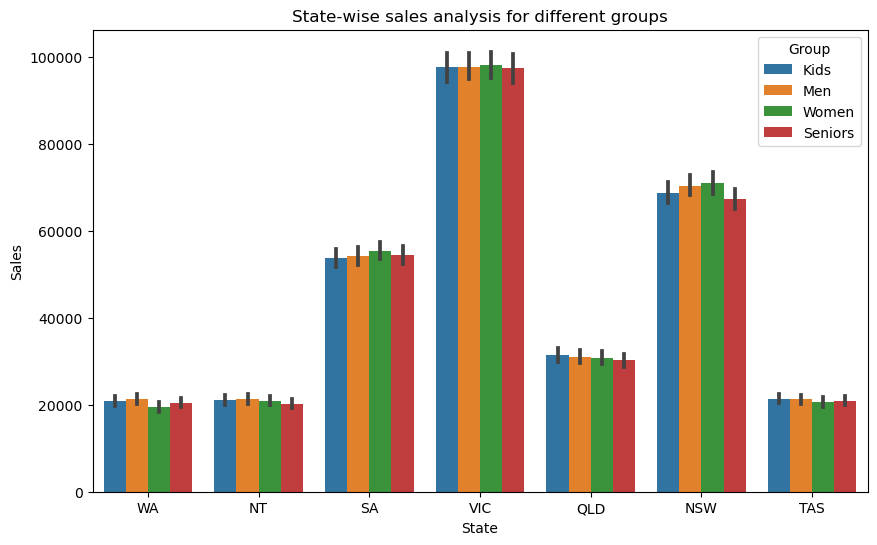

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group')
plt.title("State-wise sales analysis for different groups")
plt.show()

### Insights:
- The analysis reveals that the state of  VIC consistently exhibits the highest sales across different groups compared to other states.
- This suggests that VIC may have a strong consumer demand or market potential for the products or services offered by the business.


### Daily sales analysis for different groups

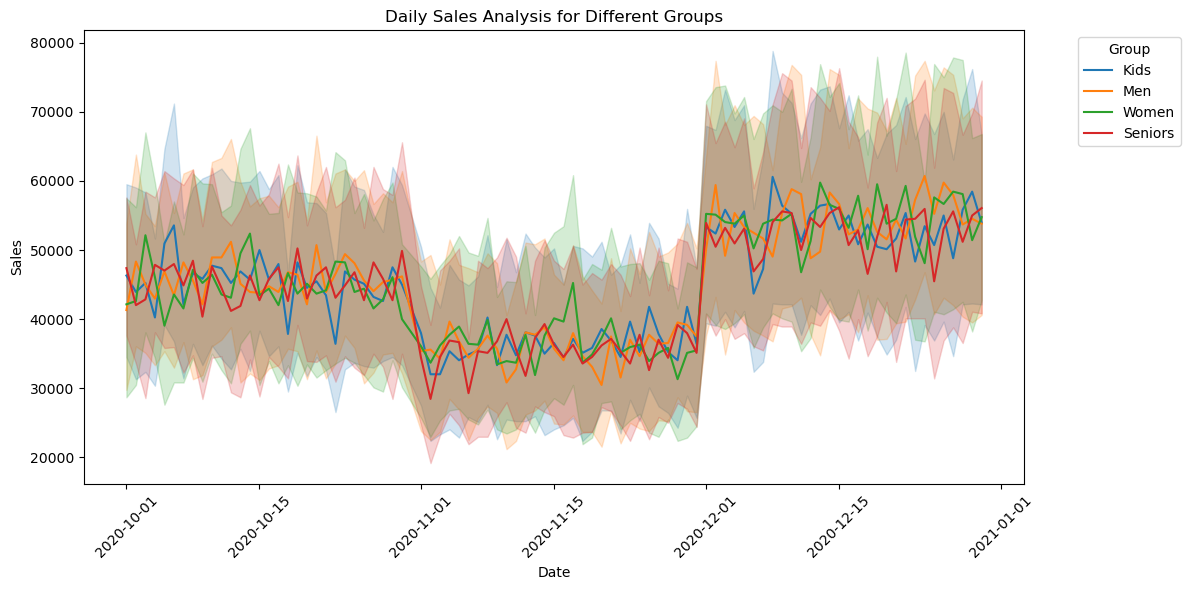

In [35]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the line plot
sns.lineplot(data=df, x='Date', y='Sales', hue='Group')

# Add labels and title
plt.title("Daily Sales Analysis for Different Groups")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
# Show legend with group labels outside the plot
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Insights  for higher sales in the month of December
- December is typically associated with holidays and festive seasons, leading to increased consumer spending on clothing for parties, gatherings, and gifting.
- December includes major shopping events like Black Friday, Cyber Monday, and Christmas sales, driving higher foot traffic and online sales. 
- They might offer year-end clearance sales to clear out old inventory and make room for new collections in the coming year


### Group-wise sales analysis across different states

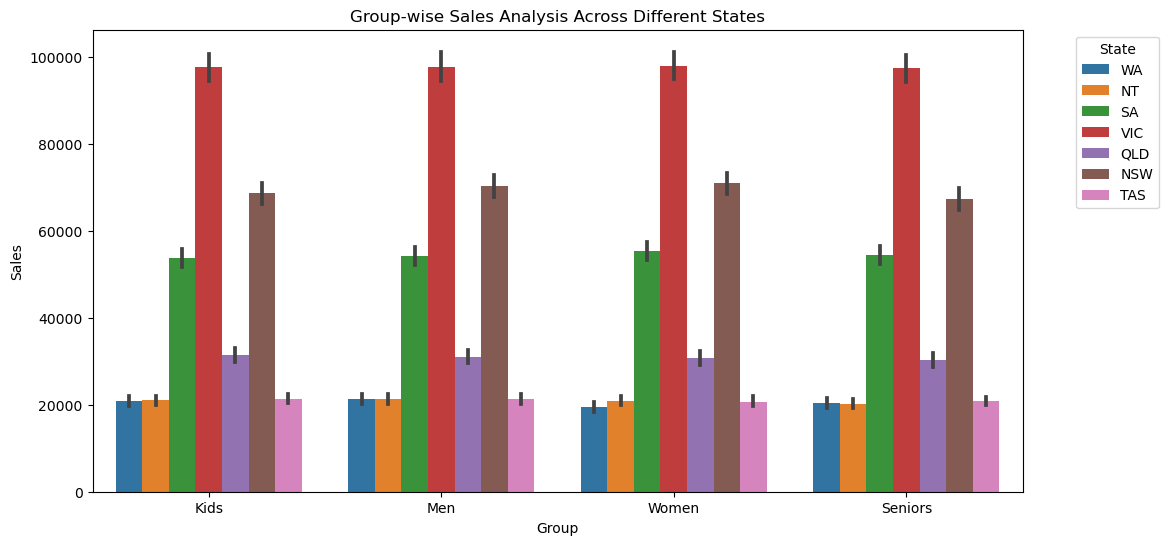

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', data=df, hue='State')
plt.title('Group-wise Sales Analysis Across Different States')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights
- The similarity in sales across different states for various groups suggests a consistent market demand nationwide. This indicates that the product offerings resonate well with customers across regions.

### Time-of-the-day analysis

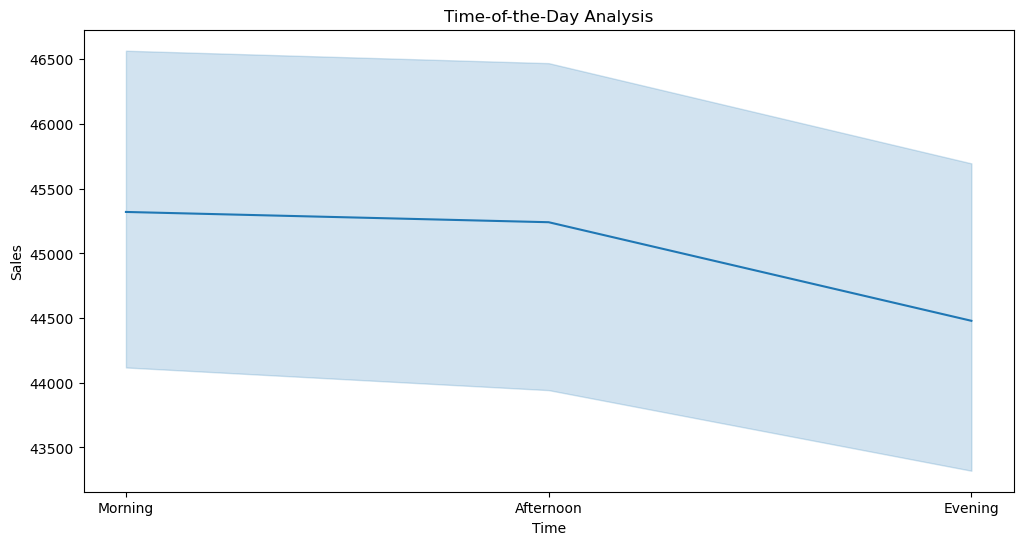

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title('Time-of-the-Day Analysis')
plt.show()

### Insights 
- The morning period shows higher sales compared to afternoon and evening times. This indicates that customers are more active and engaged with purchasing during the morning hours.

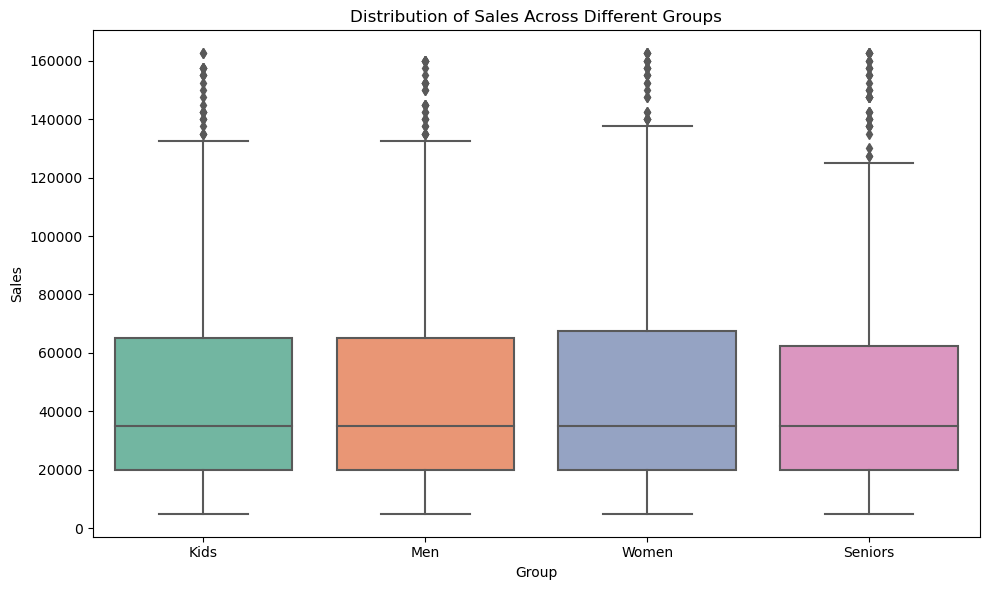

In [38]:

# Plotting boxplot for sales distribution across different groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Group', y='Sales', palette='Set2')
plt.title('Distribution of Sales Across Different Groups')
plt.tight_layout()
plt.show()


# Recommendation

- Analyze sales data and customer feedback to identify holiday season trends and styles.
- Adjust product offerings and merchandising strategies based on identified preferences.
- Develop post-holiday marketing strategies to sustain sales momentum.
- Launch new collections and engage customers with loyalty programs.
- Conduct market research to understand consumer preferences and identify untapped segments.
- Analyze competitors' strategies and market share for improvement opportunities.
- Develop targeted marketing campaigns to increase brand awareness.
- Evaluate and adjust product offerings to align with local preferences and demand.

#### RECOMMENDATION FOR USING groupby()  
- It is useful for aggregating data based on one or more variables, enabling the calculation of summary statistics like mean, sum, count, etc.

#### RECOMMENDATION FOR VISUALIZATION  
- Seaborn is preferred over other libraries due to its compatibility with Matplotlib.
- It simplifies the process of visualizing statistical data.
- Seaborn integrates seamlessly with Pandas DataFrames, making it suitable for data analysis tasks.
- Seaborn offers a wide range of built-in themes and color palettes, enhancing the aesthetics of visualizations.
- Bar plots excel in comparing sales among various states and groups, offering an effective visualization method.
- Line plots track sales trends over time effectively.
- Using color in bar plots helps distinguish between groups or states.
- Boxplots visualize sales distribution across groups, showing central tendency and variability.
- Boxplots aid in understanding sales spread within groups during exploratory analysis.

### Thanks,
#### Moirangmayum Ronaldo